In [1]:
import sys,tweepy,csv,re
from textblob import TextBlob
import matplotlib.pyplot as plt

Enter Keyword/Tag to search about: Indian Education System
Enter how many tweets to search: 1000
How people are reacting on Indian Education System by analyzing 1000 tweets.

General Report:
Weakly Positive

Detailed Report: 
10.10% people thought it was positive
20.10% people thought it was weakly positive
1.90% people thought it was strongly positive
2.30% people thought it was negative
15.20% people thought it was weakly negative
1.20% people thought it was strongly negative
27.80% people thought it was neutral


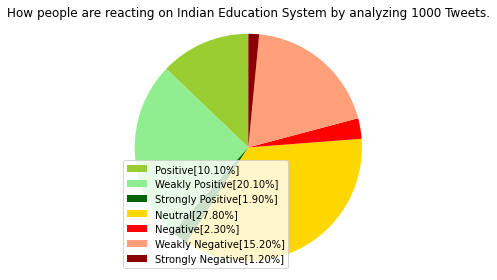

In [2]:
class SentimentAnalysis:
    def __init__(self):
        self.tweets=[]
        self.tweetText=[]
    def DownloadData(self):
        # Authenticating
        consumer_key="1JS17jSpiI34fbGaImHHTNzsF"
        consumer_secret="WWmFFP6yt6whmChMaxM2fadzLLZjMvqKt9wzsDQWfYyxtV8CpD"
        access_token="1342246677223067649-AxoCjq9P1orGDdU8AaHJtzxLkfjpJe"
        access_token_secret="QE4wYoQOq5VUlKWS2iT45SLKKFMDL8ibrwVOHfia5AX4s"
        auth=tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_token, access_token_secret)
        api=tweepy.API(auth)
        api=tweepy.API(auth,wait_on_rate_limit=True)
        # Input for term to be searched and how many tweets to search
        search_term=input("Enter Keyword/Tag to search about: ")
        Number_of_terms=int(input("Enter how many tweets to search: "))
        # Searching for tweets
        self.tweets=tweepy.Cursor(api.search,q=search_term,lang="en").items(Number_of_terms)
        # Open/create a file to append data to
        csv_file=open('result.csv','a')
        # Use csv writer
        csv_writer=csv.writer(csv_file)
        # Creating some variables to store info
        polarity=0
        positive=0
        wpositive=0
        spositive=0
        negative=0
        wnegative=0
        snegative=0
        neutral=0
        # Iterating through tweets fetched
        for tweet in self.tweets:
            # Append to temp so that we can store in csv later.I am using encode UTF-8
            self.tweetText.append(self.clean_tweet(tweet.text).encode('utf-8'))
            # print (tweet.text.translate(non_bmp_map)) #print tweet's text
            analysis=TextBlob(tweet.text)
            # print(analysis.sentiment) # print tweet's polarity
            polarity+=analysis.sentiment.polarity # adding up polarities to find the average later
            if (analysis.sentiment.polarity==0): # adding reaction of how people are reacting to find average later
                 neutral+=1
            elif (analysis.sentiment.polarity>0 and analysis.sentiment.polarity<=0.3):
                 wpositive+=1
            elif (analysis.sentiment.polarity>0.3 and analysis.sentiment.polarity<=0.6):
                positive+=1
            elif (analysis.sentiment.polarity>0.6 and analysis.sentiment.polarity<=1):
                spositive+=1
            elif (analysis.sentiment.polarity>-0.3 and analysis.sentiment.polarity<=0):
                 wnegative+=1
            elif (analysis.sentiment.polarity>-0.6 and analysis.sentiment.polarity<=-0.3):
                 negative+=1
            elif (analysis.sentiment.polarity>-1 and analysis.sentiment.polarity<=-0.6):
                 snegative+=1
        # Write to csv and close csv file
        csv_writer.writerow(self.tweetText)
        csv_file.close()
        # Finding average of how people are reacting
        positive=self.percentage(positive,Number_of_terms)
        wpositive=self.percentage(wpositive,Number_of_terms)
        spositive=self.percentage(spositive,Number_of_terms)
        negative=self.percentage(negative,Number_of_terms)
        wnegative=self.percentage(wnegative,Number_of_terms)
        snegative=self.percentage(snegative,Number_of_terms)
        neutral=self.percentage(neutral,Number_of_terms)
        # Finding average reaction
        polarity=polarity/Number_of_terms
        # Printing out data
        print("How people are reacting on "+search_term+" by analyzing "+str(Number_of_terms)+" tweets.")
        print()
        print("General Report:")
        if (polarity==0):
            print("Neutral")
        elif (polarity>0 and polarity<=0.3):
            print("Weakly Positive")
        elif (polarity>0.3 and polarity<=0.6):
            print("Positive")
        elif (polarity>0.6 and polarity<=1):
            print("Strongly Positive")
        elif (polarity>-0.3 and polarity<=0):
            print("Weakly Negative")
        elif (polarity>-0.6 and polarity<=-0.3):
            print("Negative")
        elif (polarity>-1 and polarity<=-0.6):
            print("Strongly Negative")
        print()
        print("Detailed Report: ")
        print(str(positive)+"% people thought it was positive")
        print(str(wpositive)+"% people thought it was weakly positive")
        print(str(spositive)+"% people thought it was strongly positive")
        print(str(negative)+"% people thought it was negative")
        print(str(wnegative)+"% people thought it was weakly negative")
        print(str(snegative)+"% people thought it was strongly negative")
        print(str(neutral)+"% people thought it was neutral")
        self.plot_pie_chart(positive,wpositive,spositive,negative,wnegative,snegative,neutral,search_term,Number_of_terms)
    def clean_tweet(self,tweet):
        # Remove Links, Special Characters etc from tweet
        return' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z\t])|(\w+:\/\/\S+)"," ",tweet).split())
    # Function to calculate percentage
    def percentage(self,part,whole):
        temp=100*float(part)/float(whole)
        return format(temp,'.2f')
    def plot_pie_chart(self,positive,wpositive,spositive,negative,wnegative,snegative,neutral,search_term,number_of_search_terms):
        labels=['Positive['+str(positive)+'%]','Weakly Positive['+str(wpositive)+'%]','Strongly Positive['+str(spositive)+'%]','Neutral['+str(neutral)+'%]','Negative['+str(negative)+'%]','Weakly Negative['+str(wnegative)+'%]','Strongly Negative['+str(snegative)+'%]']
        sizes=[positive,wpositive,spositive,neutral,negative,wnegative,snegative]
        colors=['yellowgreen','lightgreen','darkgreen','gold','red','lightsalmon','darkred']
        patches,texts=plt.pie(sizes,colors=colors,startangle=90)
        plt.legend(patches,labels,loc="best")
        plt.title('How people are reacting on '+search_term+' by analyzing '+str(number_of_search_terms)+' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()
if __name__== "__main__":
    sa=SentimentAnalysis()
    sa.DownloadData()